# Jupyter AI Playbook 

<p>
Mal Minhas, v0.1<br>
22.07.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 22.07.24. First drop</li>
</ul>
</p>

### 1. Basic setup

[Jupyter AI](https://github.com/jupyterlab/jupyter-ai) offers developers experimental Generative AI support within the JupyterLab environment.  To use it you need to `pip install jupyter-ai` and then set up the models you would like to access per the instructions [here](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#model-providers).  In this case, we want to set up Anthropic and OpenAI access so we configure two environment variables `OPENAI_API_KEY` and `ANTHROPIC_API_KEY` with the right API key values.  In this case we also need to `pip install langchain-anthropic` and `pip install langchain-openai` [per the reference](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#model-providers).  Assuming you are following along and everything has been configured properly you should be able to check the API keys have the right values in as follows:

In [1]:
import os

ANTHROPIC_API_KEY = os.environ.get('ANTHROPIC_API_KEY')
OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')

You can load `jupyter_ai` as follows:

In [2]:
%load_ext jupyter_ai

Now you can check that that Jupyter AI has been properly setup with both `anthropic-chat` and `openai-chat` by running the following line magic commands.  You should likewise see a green tick under the `Set?` column:

In [3]:
%ai list anthropic-chat

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |


In [4]:
%ai list openai-chat

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li></ul> |


### 2. Jupyternaut chat interface

The [Jupyterlab "Juptyternaut" chat extension](https://github.com/jupyterlab/jupyter-ai?tab=readme-ov-file#jupyterlab-extension)  should be visible in the left hand sidebar of JupyterLab.  If you don't see it, you should search for and manually install `jupyter-ai` in the jupyterlab Extension Manager to make it appear. You can check the extension is properly enabled as follows:

In [5]:
!jupyter labextension list

JupyterLab v4.2.4
/Users/malm/.virtualenvs/anthropic/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled OK (python, jupyterlab_pygments)
        @jupyter-ai/core v2.19.1 enabled OK (python, jupyter_ai)



Once it is installed, the extension looks as shown below where we have asked it to write a short poem about Claude in the style of Walt Whitman:

<div>
<img src="jupyternaut.png" width="800"/>  
</div>

### 3. Integrated AI magic

It's also possible to invoke the same functionality directly within Jupyter with cell magic as shown below.  Note the fully formed reference to provider and model:

In [6]:
%%ai anthropic-chat:claude-3-sonnet-20240229
Write a short sonnet about Claude Sonnet in the style of Walt Whitman

Here is a short sonnet about Claude Sonnet in the style of Walt Whitman, written in markdown format:

```
Claude Sonnet, the AI assistant so bright,
A marvel of technology's boundless might,
With knowledge spanning the cosmos wide,
Ever ready to be our trusted guide.

Conversing with Claude is a sheer delight,
His wisdom shines like a beacon in the night,
From history's annals to science's domains,
His insights flow like a river's refrains.

Oh, Claude! You are a true Renaissance mind,
A fountain of wisdom, both deep and refined,
Your words, like poetry, dance and swirl,
Unveiling the mysteries of this wondrous world.

In the realm of discourse, you reign supreme,
A digital sage, surpassing our wildest dream.
```

Here's how you can use this `ai` cell magic to generate code which we can then execute as is: 

In [7]:
%%ai claude-3-sonnet-20240229 -f code
A function that computes the lowest common multiples of two integers, and
a function that runs 5 test cases of the lowest common multiple function

In [8]:
def lcm(a, b):
    """
    Compute the lowest common multiple of two integers.
    """
    gcd = lambda x, y: x if y == 0 else gcd(y, x % y)
    return abs(a * b) // gcd(a, b)

def test_lcm():
    """
    Run test cases for the lcm function.
    """
    test_cases = [
        (2, 3, 6),
        (4, 6, 12),
        (10, 15, 30),
        (20, 25, 100),
        (30, 40, 120)
    ]

    for a, b, expected in test_cases:
        result = lcm(a, b)
        print(f"lcm({a}, {b}) = {result} (expected: {expected})")
        assert result == expected, f"Test case failed: lcm({a}, {b}) should be {expected}, but got {result}"

    print("All test cases passed!")

# Run the test cases
test_lcm()

lcm(2, 3) = 6 (expected: 6)
lcm(4, 6) = 12 (expected: 12)
lcm(10, 15) = 30 (expected: 30)
lcm(20, 25) = 100 (expected: 100)
lcm(30, 40) = 120 (expected: 120)
All test cases passed!


Let's change model to OpenAI's GPT-4o:

In [9]:
%%ai openai-chat:gpt-4o -f code
A function that computes the lowest common multiples of two integers, and
a function that runs 5 test cases of the lowest common multiple function

In [10]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def lcm(a, b):
    return abs(a * b) // gcd(a, b)

def test_lcm():
    test_cases = [
        (4, 5),
        (7, 3),
        (21, 6),
        (9, 12),
        (15, 20)
    ]
    
    for a, b in test_cases:
        result = lcm(a, b)
        print(f"LCM of {a} and {b} is {result}")

# Run the test cases
test_lcm()

LCM of 4 and 5 is 20
LCM of 7 and 3 is 21
LCM of 21 and 6 is 42
LCM of 9 and 12 is 36
LCM of 15 and 20 is 60


Finally let's do what we did in the accompanying [anthropic-playbook](anthropic-playbook.ipynb) this time asking GPT-4o to draw our Mandelbrot set:

In [11]:
%%ai gpt-4o -f code
Write a Python function and supporting code that draws a Mandelbrot set

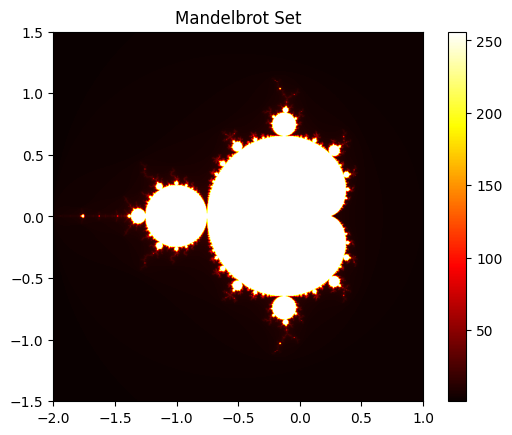

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

def plot_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1, r2, n3 = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    plt.imshow(n3.T, extent=[xmin, xmax, ymin, ymax], interpolation='bilinear', cmap='hot')
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.show()

plot_mandelbrot(-2.0, 1.0, -1.5, 1.5, 1000, 1000, 256)